# Identifying Fraud at Enron Using Emails and Financial Data

## Project Introduction

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.
For this project, predictive models were built using scikit learn, numpy, and pandas modules in Python. The target of the predictions were persons-of-interest (POI’s) who were ‘individuals who were indicted, reached a settlement, or plea deal with the government, or testified in exchange for prosecution immunity.’ Financial compensation data and aggregate email statistics from the Enron Corpus were used as features for prediction.

The goal of this project is to build a prediction model to identify persons-of-interest (POI’s.)

### Outline:

- [Understanding the Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Performing Data Analysis of the Enron Dataset](#project_1)

- [Applying Regression](#lesson_2)
- [**PROJECT 2**: Outlier Investigation](#project_2)

- [Optimize Feature Selection/Engineering](#lesson_3)
- [**PROJECT 3**: Creating New Features](#project_3)

- [Algorithms selection, Comparing Classifiers and Creating Pipelines](#lesson_5)
- [Creating pipelines and checking scores for the best Algorithm](#lesson_6)
- [**PROJECT 4**: Algorithm Selection and parameters Tuning](#project_4)

- [Validate and Evaluate](#lesson_11)
- [Dumping the classifier, dataset, and features_list for checking](#lesson_11)
- [**PROJECT 5**: Cheking the Scores via various Evaluation scores](#project_5)

**Importing Necessary Libraries**

In [2]:
import sys
import pickle
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt
%matplotlib inline

In [3]:
import pickle

enron_data = pickle.load(open("C:/Users/Geekquad/ud120-projects/final_project/final_project_dataset_modified_unix.pkl", "rb"))

## Understanding the Dataset

### Data Exploration 

Addresses the most important characteristics of the dataset and uses these characteristics to inform their analysis.

**Important characteristics include: **
-  Size of the Enron Dataset
-  Features in the Enron Dataset 
-  Finding POI's in the Enron Data
-  Queries of the Dataset
- Follow the Money
- Dealing with Unfilled Features
- Missing POI's

In [4]:
print('Number of people in the Enron dataset: {0}'.format(len(enron_data)))

Number of people in the Enron dataset: 143


In [5]:
"""Change data dictionary to pandas DataFrame"""
df = pd.DataFrame.from_records(list(enron_data.values()))
persons= pd.Series(list(enron_data.keys()))
print(persons.head())
df.head

0          METTS MARK
1       BAXTER JOHN C
2      ELLIOTT STEVEN
3    CORDES WILLIAM R
4      HANNON KEVIN P
dtype: object


<bound method NDFrame.head of        bonus deferral_payments deferred_income director_fees  \
0     600000               NaN             NaN           NaN   
1    1200000           1295738        -1386055           NaN   
2     350000               NaN         -400729           NaN   
3        NaN               NaN             NaN           NaN   
4    1500000               NaN        -3117011           NaN   
5     325000               NaN             NaN           NaN   
6        NaN           1848227             NaN           NaN   
7    2600000               NaN             NaN           NaN   
8    1150000           2157527         -934484           NaN   
9     400000           1130036          -33333           NaN   
10       NaN           2964506             NaN           NaN   
11       NaN            774401             NaN           NaN   
12    850000               NaN             NaN           NaN   
13    700000               NaN             NaN           NaN   
14       N

In [6]:
pois = [x for x, y in enron_data.items() if y['poi']]
print('Number of POI\'s(Person Of Interests): {0}'.format(len(pois)))

Number of POI's(Person Of Interests): 16


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
bonus                        143 non-null object
deferral_payments            143 non-null object
deferred_income              143 non-null object
director_fees                143 non-null object
email_address                143 non-null object
exercised_stock_options      143 non-null object
expenses                     143 non-null object
from_messages                143 non-null object
from_poi_to_this_person      143 non-null object
from_this_person_to_poi      143 non-null object
loan_advances                143 non-null object
long_term_incentive          143 non-null object
other                        143 non-null object
poi                          143 non-null bool
restricted_stock             143 non-null object
restricted_stock_deferred    143 non-null object
salary                       143 non-null object
shared_receipt_with_poi      143 non-null object
to_messages    

In [8]:
""" Nmaes of all the users in the dataset """
enron_data.keys()

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [9]:
enron_data['PRENTICE JAMES']

{'bonus': 'NaN',
 'deferral_payments': 564348,
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'james.prentice@enron.com',
 'exercised_stock_options': 886231,
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 208809,
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 564348,
 'total_stock_value': 1095040}

In [10]:
enron_data['PRENTICE JAMES']['total_stock_value']

1095040

In [11]:
enron_data['COLWELL WESLEY']['from_this_person_to_poi']

11

In [12]:
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'] 

f = open('C:/Users/Geekquad/ud120-projects/final_project/poi_names.txt', 'r')


In [13]:
print('Columns:', list(df.columns.values))
print('Shape:', df.shape)
print('Number of POI in the dataset:', (df['poi'] == 1).sum())
print('Number of non-POI in the dataset:', (df['poi'] == 0).sum())

Columns: ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'email_address', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'poi', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']
Shape: (143, 21)
Number of POI in the dataset: 16
Number of non-POI in the dataset: 127


In [14]:
df.replace(to_replace='NaN', value=np.nan, inplace=True)
print(df.isnull().sum())

bonus                         64
deferral_payments            106
deferred_income               96
director_fees                127
email_address                 34
exercised_stock_options       44
expenses                      51
from_messages                 59
from_poi_to_this_person       59
from_this_person_to_poi       59
loan_advances                141
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    126
salary                        51
shared_receipt_with_poi       59
to_messages                   59
total_payments                21
total_stock_value             20
dtype: int64



There were 143 total records and 16 POIs in the original dataset.

All features have null data.

<hr> </hr>

The features in the data fall into three major types, namely 
- financial features
- email features
- POI labels.

Financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

Email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

POI label: [‘poi’] (boolean, represented as integer)

I'm going to try to use all features, filter them and choose the best.

### End of Project 1 
<hr> </hr>

## Regression (Outlier Investigation)

Identifying outlier(s) in the financial data, and explaining how they are removed or otherwise handled.

In [15]:
## Remove column from df if null counter > 65
for column, series in df.iteritems():
    if series.isnull().sum()> 65:
        df.drop(column, axis=1, inplace=True)
        
## Remove email address column
if 'email_address' in list(df.columns.values):
    df.drop('email_address', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
bonus                      79 non-null float64
exercised_stock_options    99 non-null float64
expenses                   92 non-null float64
from_messages              84 non-null float64
from_poi_to_this_person    84 non-null float64
from_this_person_to_poi    84 non-null float64
other                      90 non-null float64
poi                        143 non-null bool
restricted_stock           107 non-null float64
salary                     92 non-null float64
shared_receipt_with_poi    84 non-null float64
to_messages                84 non-null float64
total_payments             122 non-null float64
total_stock_value          123 non-null float64
dtypes: bool(1), float64(13)
memory usage: 14.7 KB


In [17]:
#Imputing the missing values
df_imp = df.replace(to_replace=np.nan, value=0)
df_imp = df.fillna(0).copy(deep=True)
df_imp.columns = list(df.columns.values)

print(df_imp.isnull().sum())
print(df_imp.head())

df_imp.describe()

bonus                      0
exercised_stock_options    0
expenses                   0
from_messages              0
from_poi_to_this_person    0
from_this_person_to_poi    0
other                      0
poi                        0
restricted_stock           0
salary                     0
shared_receipt_with_poi    0
to_messages                0
total_payments             0
total_stock_value          0
dtype: int64
       bonus  exercised_stock_options  expenses  from_messages  \
0   600000.0                      0.0   94299.0           29.0   
1  1200000.0                6680544.0   11200.0            0.0   
2   350000.0                4890344.0   78552.0            0.0   
3        0.0                 651850.0       0.0           12.0   
4  1500000.0                5538001.0   34039.0           32.0   

   from_poi_to_this_person  from_this_person_to_poi      other    poi  \
0                     38.0                      1.0     1740.0  False   
1                      0.0            

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,5.926127e+05,1.715504e+06,34719.447552,365.118881,37.552448,24.475524,2.267385e+05,7.235235e+05,1.714731e+05,676.384615,1191.972028,1.489942e+06,2.404233e+06
std,1.036924e+06,3.694149e+06,45235.547286,1455.675655,74.148184,80.080666,7.552178e+05,1.571184e+06,1.660404e+05,1066.923179,2223.860300,2.386745e+06,4.422592e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.604490e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,8.929250e+04,2.148255e+05
50%,2.500000e+05,6.014380e+05,17355.000000,16.000000,1.000000,0.000000,8.910000e+02,3.466630e+05,2.061210e+05,91.000000,266.000000,9.114530e+05,9.543540e+05
75%,8.000000e+05,1.636136e+06,52688.500000,50.500000,39.500000,12.500000,1.492040e+05,6.801640e+05,2.670975e+05,869.000000,1504.000000,1.858492e+06,2.217787e+06
max,8.000000e+06,3.076606e+07,228763.000000,14368.000000,528.000000,609.000000,7.427621e+06,1.384707e+07,1.060932e+06,5521.000000,15149.000000,1.725253e+07,3.076606e+07


In [18]:
### Queries of the Dataset ###
enron_data['THE TRAVEL AGENCY IN THE PARK']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

coef [1.97017287]
intercept 662220.417601581


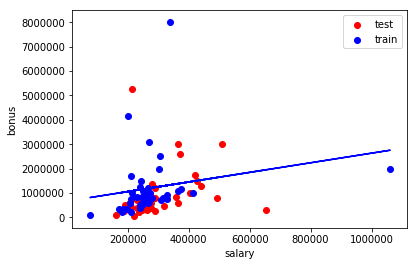

In [19]:
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load(open("C:/Users/Geekquad/ud120-projects/final_project/final_project_dataset_modified_unix.pkl", "rb"))
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)
print('coef', reg.coef_)
print('intercept', reg.intercept_)
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color = test_color)
    
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color= train_color)
    
plt.scatter(feature_test[0], target_test[0], color=test_color, label='test')
plt.scatter(feature_test[0], target_test[0], color=train_color, label='train')
plt.plot(feature_test, reg.predict(feature_test))
plt.plot(feature_train, reg.predict(feature_train), color="b")
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [20]:
# dropping row for 'THE TRAVEL AGENCY IN THE PARK'
park_index = list(enron_data.keys()).index('THE TRAVEL AGENCY IN THE PARK')
print(park_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

98


In [21]:
enron_data['LOCKHART EUGENE E']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [22]:
# dropping row for 'LOCKHART EUGENE E'
lockhart_index = list(enron_data.keys()).index('LOCKHART EUGENE E')
print(lockhart_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

89


- 'THE TRAVEL AGENCY IN THE PARK' was removed since it is not a person. 
- 'LOCKHART EUGENE E' was removed during data processing since this row had no entries for any feature.

### End of Project 2
<hr> </hr>

## Optimize Feature Selection/Engineering

In [23]:
enron_df = df_imp_sub

### Studying Financial Features: 

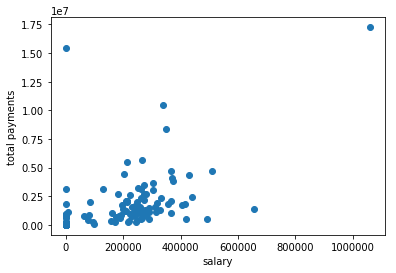

In [24]:
import matplotlib.pyplot as plt
plt.scatter(enron_df['salary'], enron_df['total_payments'])
plt.xlabel("salary")
plt.ylabel("total payments")
plt.show()

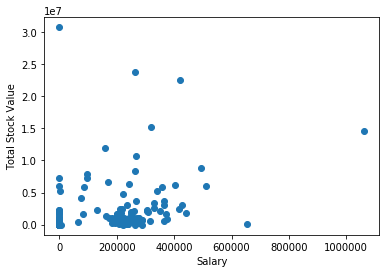

In [25]:
plt.scatter(enron_df['salary'], enron_df['total_stock_value'])
plt.xlabel("Salary")
plt.ylabel("Total Stock Value")
plt.show()

#### Creating New deatures for Financial Features

In [26]:
enron_df[enron_df['total_stock_value'].isnull()]

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


In [27]:
"""Creating new features 'salary_of_total_payments' and 'salary_of_total_stock_value"""
enron_df['salary_of_total_payments'] = 0.0
enron_df['salary_of_total_stock_value'] = 0.0
enron_df.loc[enron_df['total_payments'] !=0.0, 'salary_of_total_payments'] = enron_df['salary']/enron_df['total_payments']*100
enron_df.loc[enron_df['total_stock_value'] != 0.0,'salary_of_total_stock_value'] = enron_df['salary'] / enron_df['total_stock_value']*100


In [28]:
enron_df.head()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,salary_of_total_payments,salary_of_total_stock_value
0,600000.0,0.0,94299.0,29.0,38.0,1.0,1740.0,False,585062.0,365788.0,702.0,807.0,1061827.0,585062.0,34.448926,62.521237
1,1200000.0,6680544.0,11200.0,0.0,0.0,0.0,2660303.0,False,3942714.0,267102.0,0.0,0.0,5634343.0,10623258.0,4.740606,2.514313
2,350000.0,4890344.0,78552.0,0.0,0.0,0.0,12961.0,False,1788391.0,170941.0,0.0,0.0,211725.0,6678735.0,80.737277,2.559482
3,0.0,651850.0,0.0,12.0,10.0,0.0,0.0,False,386335.0,0.0,58.0,764.0,0.0,1038185.0,0.000000,0.000000
4,1500000.0,5538001.0,34039.0,32.0,32.0,21.0,11350.0,True,853064.0,243293.0,1035.0,1045.0,288682.0,6391065.0,84.277163,3.806768


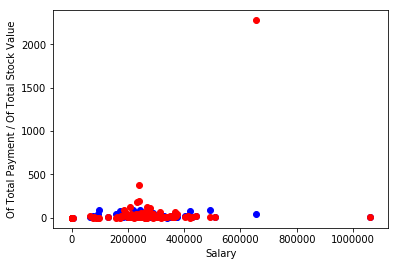

In [29]:
# Graph 'salary_of_total_payment' and 'salary_of_total_stock_value' to salary
plt.scatter(enron_df['salary'], enron_df['salary_of_total_payments'], color='blue')
plt.scatter(enron_df['salary'], enron_df['salary_of_total_stock_value'], color='red')
plt.xlabel('Salary')
plt.ylabel('Of Total Payment / Of Total Stock Value')
plt.show()

#### Creating New Features for Email related features

In [30]:
def outlierCleaner(predictions, ages, net_worths):
    cleaned_Data = []
    for i in range(0, len(predictions)):
        age = ages[i][0]
        new_worth = net_worths[i][0]
        pred = predictions[i][0]
        err = net_worth - pred
        cleaned_data.append((age, net_worth, err))
        
    cleaned_data = sorted(cleaned_data, key=lambda x:x[2], reverse=True)[0:81]
    
    print('length of cleaned_data :', len(cleaned_data))
    return cleaned_data

#### Creating a column 'poi_ratio' to store POIs(Person Of Interest) related messages ratio in percentages.
#### Also, will be adding new features:
- the fraction of all emails to any **person** that went from a **person of interest**
- the fraction of all emails that a **person** sent that were addressed to **persons of interest**

The hypothesis behind these features is that there might be a stronger email connections between POIs than between POIs and non-POIs, and a **scatter plot** of these two features suggests that there might be some truth to that hypothesis. 

Moreover, I am scaling **'salary'** to a range [0, 100]

In [31]:
enron_df['poi_ratio'] = 0.0
enron_df['fraction_to_poi'] = 0.0
enron_df['fraction_from_poi'] = 0.0

enron_df.loc[(enron_df['from_messages'] + enron_df['to_messages']) != 0.0, 'poi_ratio'] = (enron_df['from_poi_to_this_person'] + enron_df['from_this_person_to_poi']) / (enron_df['from_messages'] + enron_df['to_messages']) * 100
enron_df.loc[enron_df['from_messages'] != 0.0, 'fraction_to_poi'] = enron_df['from_this_person_to_poi'] / enron_df['from_messages'] * 100
enron_df.loc[enron_df['to_messages'] != 0.0, 'fraction_from_poi']= enron_df['from_poi_to_this_person'] / enron_df['to_messages'] * 100

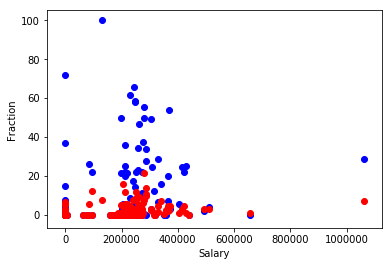

In [32]:
# Graph 'fraction_to_poi' and 'fraction_from_poi' to salary
plt.scatter(enron_df['salary'], enron_df['fraction_to_poi'], color='blue')
plt.scatter(enron_df['salary'], enron_df['fraction_from_poi'], color='red')
plt.xlabel('Salary')
plt.ylabel('Fraction')
plt.show()

#### Moving 'poi' to the first column

In [33]:
cols = enron_df.columns.tolist()
cols = cols[7:8] + cols[:7] + cols[8:]
enron_df = enron_df[cols]

In [34]:
enron_df.columns.values

array(['poi', 'bonus', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person',
       'from_this_person_to_poi', 'other', 'restricted_stock', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value', 'salary_of_total_payments',
       'salary_of_total_stock_value', 'poi_ratio', 'fraction_to_poi',
       'fraction_from_poi'], dtype=object)

In [35]:
enron_df.head()

,poi,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,salary_of_total_payments,salary_of_total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi
0,False,600000.0,0.0,94299.0,29.0,38.0,1.0,1740.0,585062.0,365788.0,702.0,807.0,1061827.0,585062.0,34.448926,62.521237,4.665072,3.448276,4.708798
1,False,1200000.0,6680544.0,11200.0,0.0,0.0,0.0,2660303.0,3942714.0,267102.0,0.0,0.0,5634343.0,10623258.0,4.740606,2.514313,0.000000,0.000000,0.000000
2,False,350000.0,4890344.0,78552.0,0.0,0.0,0.0,12961.0,1788391.0,170941.0,0.0,0.0,211725.0,6678735.0,80.737277,2.559482,0.000000,0.000000,0.000000
3,False,0.0,651850.0,0.0,12.0,10.0,0.0,0.0,386335.0,0.0,58.0,764.0,0.0,1038185.0,0.000000,0.000000,1.288660,0.000000,1.308901
4,True,1500000.0,5538001.0,34039.0,32.0,32.0,21.0,11350.0,853064.0,243293.0,1035.0,1045.0,288682.0,6391065.0,84.277163,3.806768,4.921077,65.625000,3.062201


In [36]:
enron_df.describe()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,salary_of_total_payments,salary_of_total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi
count,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,142.000000,1.420000e+02,1.420000e+02,1.420000e+02,142.000000,142.000000,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.967860e+05,1.727585e+06,34963.950704,367.690141,37.816901,24.647887,2.257853e+05,7.286187e+05,1.726806e+05,681.147887,1200.366197,1.497885e+06,2.421165e+06,15.198587,35.821064,2.844448,10.638415,2.261809
std,1.039388e+06,3.704389e+06,45300.747867,1460.502581,74.342949,80.337515,7.578048e+05,1.575560e+06,1.659968e+05,1069.172948,2229.457770,2.393296e+06,4.433593e+06,20.375767,194.171876,4.312736,18.454284,3.667065
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.604490e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.115000e+03,0.000000e+00,0.000000,0.000000,8.839225e+04,2.288695e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.750000e+05,6.046375e+05,18094.500000,16.500000,2.500000,0.000000,8.825000e+02,3.535955e+05,2.083105e+05,102.500000,289.000000,9.138250e+05,9.551135e+05,9.792470,5.889988,0.787407,0.000000,0.297659
75%,8.000000e+05,1.636585e+06,52905.250000,51.250000,39.750000,12.750000,1.454285e+05,6.892030e+05,2.670998e+05,871.500000,1513.000000,1.863625e+06,2.218031e+06,21.593596,22.361452,4.367335,16.995688,3.012120
max,8.000000e+06,3.076606e+07,228763.000000,14368.000000,528.000000,609.000000,7.427621e+06,1.384707e+07,1.060932e+06,5521.000000,15149.000000,1.725253e+07,3.076606e+07,94.795031,2274.591986,22.435175,100.000000,21.734104


In [37]:
enron_df.shape

(142, 19)

In [38]:
enron_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 19 columns):
poi                            142 non-null bool
bonus                          142 non-null float64
exercised_stock_options        142 non-null float64
expenses                       142 non-null float64
from_messages                  142 non-null float64
from_poi_to_this_person        142 non-null float64
from_this_person_to_poi        142 non-null float64
other                          142 non-null float64
restricted_stock               142 non-null float64
salary                         142 non-null float64
shared_receipt_with_poi        142 non-null float64
to_messages                    142 non-null float64
total_payments                 142 non-null float64
total_stock_value              142 non-null float64
salary_of_total_payments       142 non-null float64
salary_of_total_stock_value    142 non-null float64
poi_ratio                      142 non-null float64
fraction_to_po

### Setting up label, features and predictors 

In [39]:
predictors = enron_df.drop('poi', axis=1).columns.values
print(predictors)

['bonus' 'exercised_stock_options' 'expenses' 'from_messages'
 'from_poi_to_this_person' 'from_this_person_to_poi' 'other'
 'restricted_stock' 'salary' 'shared_receipt_with_poi' 'to_messages'
 'total_payments' 'total_stock_value' 'salary_of_total_payments'
 'salary_of_total_stock_value' 'poi_ratio' 'fraction_to_poi'
 'fraction_from_poi']


### Selecting Features Intelligently

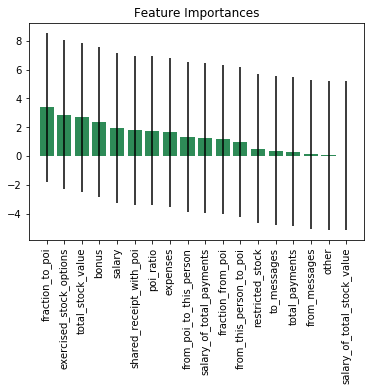

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import KFold
%matplotlib inline

selector = SelectKBest(f_classif, k=5)
selector.fit(enron_df[predictors], enron_df['poi'])

scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
sorted_important_features = []
for i in indices:
    sorted_important_features.append(predictors[i])

# Plot the scores.  
plt.figure()
plt.title("Feature Importances")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=np.std([indices]), align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

Based on the above sorted importance value, dropping columns of lower importance value. 
- 'salary_of_total_stock_value', 
- 'other', 
- 'from_messages', 
- 'total_payments', 
- 'to_messages'

In [41]:
# 13 features
predictors = ['bonus', 'exercised_stock_options', 'expenses','from_poi_to_this_person', 'from_this_person_to_poi',
 'restricted_stock', 'salary', 'shared_receipt_with_poi','total_stock_value', 'poi_ratio', 'fraction_to_poi',
 'fraction_from_poi', 'salary_of_total_payments']

# 8 features
predictors_8 = ['bonus', 'exercised_stock_options', 'total_stock_value', 'fraction_to_poi',  'expenses', 'salary',
              'shared_receipt_with_poi', 'poi_ratio']

# 4 features
predictors_4 = ['bonus', 'exercised_stock_options', 'total_stock_value', 'fraction_to_poi']

In [42]:
""" Splitting the data on training and test data. I will use Stratified Shuffle Split due to small dataset. """
labels = enron_df['poi'].copy(deep=True).astype(int).as_matrix()
features = (enron_df[predictors]).fillna(0).copy(deep=True).as_matrix()
print(labels)
print(features)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
[[6.00000000e+05 0.00000000e+00 9.42990000e+04 ... 3.44827586e+00
  4.70879802e+00 3.44489262e+01]
 [1.20000000e+06 6.68054400e+06 1.12000000e+04 ... 0.00000000e+00
  0.00000000e+00 4.74060596e+00]
 [3.50000000e+05 4.89034400e+06 7.85520000e+04 ... 0.00000000e+00
  0.00000000e+00 8.07372771e+01]
 ...
 [6.00000000e+05 3.18125000e+06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.42722596e+01]
 [8.00000000e+05 7.65920000e+05 9.62680000e+04 ... 5.00000000e+01
  2.17341040e+01 3.18124829e+01]
 [6.00000000e+05 3.84728000e+05 1.25978000e+05 ... 3.75000000e+01
  5.95647194e+00 2.16127060e+01]]


#### Properly Scaling Features
If algorithm calls for scaled features, feature scaling is deployed.

In [43]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)
salary_scaled = scaler.fit_transform(enron_df['salary'])

ValueError: Expected 2D array, got 1D array instead:
array=[3.657880e+05 2.671020e+05 1.709410e+05 0.000000e+00 2.432930e+05
 2.670930e+05 0.000000e+00 3.704480e+05 3.741250e+05 1.970910e+05
 1.307240e+05 0.000000e+00 2.485460e+05 2.574860e+05 0.000000e+00
 0.000000e+00 2.885420e+05 2.516540e+05 2.885580e+05 6.374400e+04
 0.000000e+00 3.570910e+05 2.714420e+05 0.000000e+00 0.000000e+00
 3.041100e+05 0.000000e+00 1.879220e+05 0.000000e+00 2.136250e+05
 2.492010e+05 0.000000e+00 2.313300e+05 0.000000e+00 1.822450e+05
 0.000000e+00 2.117880e+05 0.000000e+00 0.000000e+00 0.000000e+00
 2.243050e+05 2.737460e+05 3.392880e+05 2.165820e+05 2.105000e+05
 0.000000e+00 0.000000e+00 2.728800e+05 4.770000e+02 0.000000e+00
 2.690760e+05 4.287800e+05 2.118440e+05 0.000000e+00 2.061210e+05
 1.742460e+05 5.103640e+05 3.650380e+05 0.000000e+00 3.651630e+05
 1.627790e+05 0.000000e+00 2.364570e+05 0.000000e+00 2.615160e+05
 3.290780e+05 0.000000e+00 1.848990e+05 1.920080e+05 0.000000e+00
 2.626630e+05 3.045880e+05 0.000000e+00 0.000000e+00 2.786010e+05
 0.000000e+00 1.991570e+05 0.000000e+00 9.684000e+04 8.081800e+04
 2.139990e+05 2.627880e+05 2.106920e+05 2.220930e+05 4.406980e+05
 0.000000e+00 2.401890e+05 4.206360e+05 2.751010e+05 0.000000e+00
 3.142880e+05 9.494100e+04 0.000000e+00 2.395020e+05 0.000000e+00
 0.000000e+00 0.000000e+00 6.615000e+03 2.885890e+05 4.043380e+05
 0.000000e+00 2.599960e+05 3.175430e+05 0.000000e+00 2.019550e+05
 2.481460e+05 0.000000e+00 0.000000e+00 0.000000e+00 2.634130e+05
 0.000000e+00 7.639900e+04 6.550370e+05 0.000000e+00 2.618090e+05
 2.480170e+05 0.000000e+00 2.292840e+05 2.319460e+05 2.210030e+05
 1.584030e+05 0.000000e+00 2.501000e+05 4.923750e+05 1.060932e+06
 2.618790e+05 0.000000e+00 2.396710e+05 0.000000e+00 0.000000e+00
 0.000000e+00 3.099460e+05 0.000000e+00 8.527400e+04 2.473380e+05
 3.494870e+05 3.305460e+05 0.000000e+00 4.151890e+05 2.652140e+05
 2.786010e+05 2.749750e+05].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### End of Project 3
<hr> </hr>

## Picking and Tuning an Algorithm:

I will be using several types of Algorithms and compare their performance. The more performant one will be ised in the final analysis. 

In [44]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
scores = sklearn.cross_validation.cross_val_score(gnb_clf, enron_df[predictors_8], labels)
print(scores)
print('GaussianNB mean score:', scores.mean())

#Support Vector Machines
from sklearn.svm import SVC
svc_clf = SVC()
scores = sklearn.cross_validation.cross_val_score(svc_clf, enron_df[predictors_8], labels)
print(scores)
print('SVC mean score:', scores.mean())

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
scores = sklearn.cross_validation.cross_val_score(rf_clf, enron_df[predictors_8], labels)
print(scores)
print('RandomForestClassifier mean score:' ,scores.mean())

#Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
erf_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = sklearn.cross_validation.cross_val_score(erf_clf, enron_df[predictors_8], labels)
print(scores)
print('ExtraTressClassifier mean score:', scores.mean())

#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(n_estimators=100)
scores = sklearn.cross_validation.cross_val_score(adb_clf, enron_df[predictors_8], labels)
print(scores)
print('AdaBoostClassifier mean score:', scores.mean())

#Logistic Regression
from sklearn.linear_model import LogisticRegression
lreg_clf = LogisticRegression()
scores = sklearn.cross_validation.cross_val_score(lreg_clf, enron_df[predictors_8], labels)
print(scores)
print('Logistic Regression mean score:', scores.mean())

#Linear SVC
from sklearn.svm import LinearSVC
lsvc_clf = LinearSVC()
scores = sklearn.cross_validation.cross_val_score(lsvc_clf, enron_df[predictors_8], labels)
print(scores)
print('Linear SVC mean score:', scores.mean())

[0.83333333 0.89361702 0.85106383]
GaussianNB mean score: 0.859338061465721
[0.875      0.89361702 0.89361702]
SVC mean score: 0.8874113475177304
[0.875      0.89361702 0.87234043]
RandomForestClassifier mean score: 0.8803191489361701
[0.83333333 0.91489362 0.87234043]
ExtraTressClassifier mean score: 0.8735224586288416


C:\Users\Geekquad\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.85416667 0.80851064 0.82978723]
AdaBoostClassifier mean score: 0.8308215130023641
[0.75       0.78723404 0.78723404]
Logistic Regression mean score: 0.774822695035461
[0.35416667 0.89361702 0.89361702]
Linear SVC mean score: 0.7138002364066193


### Comparing Classifiers based on cross-validation scores:
- **1st tier:** SVC, RandomForestClassifier
- **2nd tier:** GaussianNB, ExtraTreesClassifier, AdaBoostClassifier
- **3rd tier:** Logistic Regression, LinearSVC
<hr> </hr>

### Univariate Feature Selection with F-test for Feature Scoring
Using the default selection function: the 10% most significant features

<Container object of 13 artists>

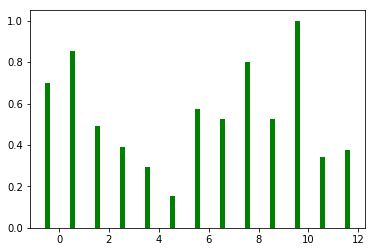

In [45]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features, labels)
scores = -np.log(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(features.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,label=r'Univariate score ($-Log(p_[value])&)', color='green')

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=8)
selection = SelectKBest(k=4)

#Building an estimator from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

#Using combined features to transform dataset:
X_features = combined_features.fit(features, labels).transform(features)

svm = SVC(kernel="linear")
pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(features, labels)
print(grid_search.best_estimator_)

### Creating a pipeline that extracts features from the data using PCA and SelectKBest and then creates a model_SVC 

In [46]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

#Creating feature union
features_pipeline = []
features_pipeline.append(('pca', PCA(n_components=4)))
features_pipeline.append(('select_best', SelectKBest(k=8)))
feature_union = FeatureUnion(features_pipeline)

#Creating a pipeline for rbfSVC
estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('logistic', LogisticRegression()))
estimators.append(('svc', SVC(kernel='rbf', class_weight='balanced')))
model_svc = Pipeline(estimators)

param_grid = {
            'svc__C': [1e3, 5e3, 1e4, 5e4, 1e5],
            'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1 ],
            'svc__degree': [1, 2, 3, 4, 5]
}

grid_svc = GridSearchCV(model_svc, param_grid)
grid_svc = grid_svc.fit(features, labels)
print(grid_svc.best_estimator_)

Pipeline(memory=None,
     steps=[('feature_union', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('select_best', SelectKBest(k=8, score_func=<function f_classif at 0x000001E4545E7510>))],
       tr...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


In [47]:
best_svc_pipe = grid_svc.best_estimator_ 

#Evaluating pipeline for rbfSVC
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
scores_svc = cross_val_score(model_svc, enron_df[predictors], labels, cv=kfold)
print('rbfSVC mean score:', scores_svc.mean())

rbfSVC mean score: 0.8866666666666667


### Creating Pipeline for RandomForest:

In [48]:
from sklearn.ensemble import RandomForestClassifier
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('RandomForest', RandomForestClassifier()))
model_rf = Pipeline(estimators)
print(sorted(model_rf.get_params().keys()))


['RandomForest', 'RandomForest__bootstrap', 'RandomForest__class_weight', 'RandomForest__criterion', 'RandomForest__max_depth', 'RandomForest__max_features', 'RandomForest__max_leaf_nodes', 'RandomForest__min_impurity_decrease', 'RandomForest__min_impurity_split', 'RandomForest__min_samples_leaf', 'RandomForest__min_samples_split', 'RandomForest__min_weight_fraction_leaf', 'RandomForest__n_estimators', 'RandomForest__n_jobs', 'RandomForest__oob_score', 'RandomForest__random_state', 'RandomForest__verbose', 'RandomForest__warm_start', 'feature_union', 'feature_union__n_jobs', 'feature_union__pca', 'feature_union__pca__copy', 'feature_union__pca__iterated_power', 'feature_union__pca__n_components', 'feature_union__pca__random_state', 'feature_union__pca__svd_solver', 'feature_union__pca__tol', 'feature_union__pca__whiten', 'feature_union__select_best', 'feature_union__select_best__k', 'feature_union__select_best__score_func', 'feature_union__transformer_list', 'feature_union__transformer

In [49]:
"""Finding the best fitting parameter"""
param_grid = {'RandomForest__n_estimators': [10,20,30,40,50],
               'RandomForest__min_samples_split' :[2,3,4,5],
               'RandomForest__min_samples_leaf' : [1,2,3]
             }

grid_rf = GridSearchCV(model_rf, param_grid)
grid_rf = grid_rf.fit(features, labels)
print(grid_rf.best_estimator_)

#Best fitting svc_clf
best_rf_pipe = grid_rf.best_estimator_ 


#Evaluating pipeline for rf
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
scores_rf = cross_val_score(model_rf, enron_df[predictors], labels, cv=kfold)
print('RandomForest mean score:', scores_rf.mean())

Pipeline(memory=None,
     steps=[('feature_union', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('select_best', SelectKBest(k=8, score_func=<function f_classif at 0x000001E4545E7510>))],
       tr...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
RandomForest mean score: 0.8376190476190477


### Finding best fit parameter for SVM(kernel='rbf') with PCA and cross validation:

In [50]:
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV

pca = PCA(n_components = 4).fit(features)
features_transformed = pca.transform(features)
features_pca = pca.components_

print('features_transformed[0]:', features_transformed[0])
print('features_pca[0]:', features_pca[0])

features_transformed[0]: [-2506859.0949976    293144.67073684    57877.13636437   198705.96409751]
features_pca[0]: [2.49554034e-02 6.25367378e-01 8.39959560e-04 1.10822385e-06
 4.25848400e-07 1.44191017e-01 7.10858298e-03 9.51787674e-06
 7.66453249e-01 5.17628083e-09 2.08830520e-08 1.04464719e-08
 8.33085929e-07]


In [51]:
#Training a SVM Classification Model

param_grid = {
             'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
             'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
             'degree': [1,2,3,4,5]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(features_transformed, labels)
pred_svc = clf.predict(features_transformed)

print(clf.best_estimator_)
best_svc_clf = clf.best_estimator_

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [52]:
scores = sklearn.cross_validation.cross_val_score(best_svc_clf, features, labels)
print('SVC after PCA mean score:', scores.mean())

SVC after PCA mean score: 0.8874113475177304


In [53]:
pred_svc = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False).fit(features_transformed, labels).predict(features_transformed)

print(pred_svc)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]


In [54]:
"""Getting the best-fit parameters for RandomForest"""
pca = PCA(n_components = 8).fit(features)
features_pca = pca.transform(features)
cv = KFold(n_splits=5)

parameters = {'n_estimators': [10,20,30,40,50],
               'min_samples_split' :[2,3,4,5],
               'min_samples_leaf' : [1,2,3]
             }

rf_clf = RandomForestClassifier()
grid_obj = GridSearchCV(rf_clf, parameters)
grid_fit = grid_obj.fit(features_pca, labels)

best_rf_clf = grid_fit.best_estimator_ 
best_rf_clf.fit(features,labels)

scores = sklearn.cross_validation.cross_val_score(clf, features, labels)
print('RandomForest mean score:', scores.mean())

RandomForest mean score: 0.8874113475177304


### End of Project 4
<hr> </hr>

## Validation and Evaluation:

Validation is the processed of checking to see how your model performs on unseen data.

In [56]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features_transformed, labels, test_size=0.3, random_state=42)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [58]:
print(features_transformed[0])
enron_df['poi'].tolist()[0]

[-2506859.0949976    293144.67073684    57877.13636437   198705.96409751]


False

#### Preparing parameters from dumping the classifier

In [77]:
import collections
from collections import OrderedDict
clf_dump = best_svc_clf


features_list = ['comp_1', 'comp_2', 'comp_3', 'comp_4']
poi_list = enron_df['poi'].tolist()
data_list = features_transformed

my_dataset = {}

i = 0
for item in data_list:
    ele_dict = OrderedDict()
    ele_dict['poi'] = poi_list[i]
    for j in range(len(features_list)):
        ele_dict[features_list[j]] = data_list[i][j]
    my_dataset[i] = ele_dict
    i += 1
print(my_dataset[0])

OrderedDict([('poi', False), ('comp_1', -2506859.0949976), ('comp_2', 293144.67073684005), ('comp_3', 57877.136364365026), ('comp_4', 198705.96409751067)])


In [78]:
pred = best_svc_clf.predict(features_test)
acc = accuracy_score(labels_test, pred)

print("## Validating algorithm ##")
print("Accuracy after tuning = ", acc)
print("Precision =", precision_score(labels_test, pred))
print("Recall = ", recall_score(labels_test, pred))


## Validating algorithm ##
Accuracy after tuning =  1.0
Precision = 1.0
Recall =  1.0


In [79]:
print(my_dataset[0].keys())

odict_keys(['poi', 'comp_1', 'comp_2', 'comp_3', 'comp_4'])


### End of Project 4
<hr> </hr>